### Example simulated annnealing optimization.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from random import seed

from simulate import SimulatedAnnealing
from simulate import Methods

Define the objective function. This states the function to be minimised during the simulated annealing optimisation. In this implementation of the simulated annealing algorithm, the bounds of the function as well as some key parameters of the algorithm (start and end temperature, the step size, and the terminationn conditions) need to be defined.

A range of different termination conditions can be given. For example, if an empty termination dictionary is provided, but an end temperature is, then the end temperature being reached will be the termination condition. In this example, no end temperature is given but a terminationn condition of the maximum numer of steps is given, and set at 1000 iterations.

In [2]:
seed(30)

In [3]:
def quadratic(x):
    return x[0]**2.0

bounds = np.array([[-5, 5]])
temp_range = [10, None]
step_size = 0.1
termination = {'max_step': 10000}

In this example, and simple quadratic function with a single minima at $x = 0$ (as indicated by the red line) is used:

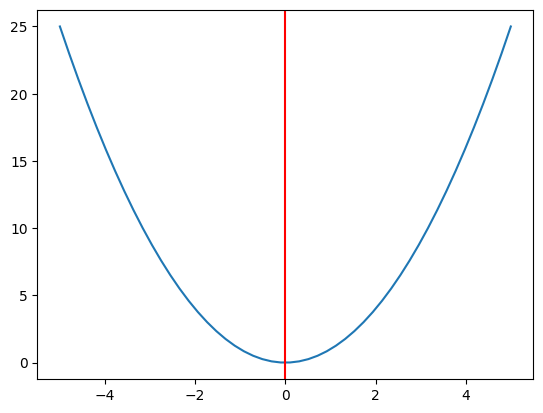

In [4]:
x = np.linspace(-5, 5, 50)
y = []
for element in x:
    y.append(quadratic([element]))
plt.plot(x, y)
plt.axvline(x = 0, color = 'r', label = 'axvline - full height')

We now run the simulated annealing algorithm, obtaining information on the series of steps taken and the changes in temperature. We can then plot the route taken by the algorithm, and see that after around 500 iterations the optimum has been found.

In [5]:
# Instantiate the Simulated Annealing class
anneal_quadratic = SimulatedAnnealing(quadratic, bounds, temp_range, step_size, termination)
# Run the simulated annealing algorithm
quadratic_path, T_path = anneal_quadratic.SimulatedAnneal()

print('Final x value after 10000 iterations:', quadratic_path[-1])
print('Function value after 10000 iterations:', quadratic(quadratic_path[-1]))

Final x value after 10000 iterations: [-0.01311496]
Function value after 10000 iterations: 0.00017200220438122466


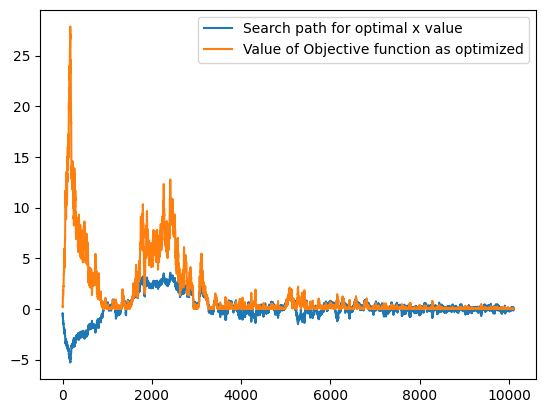

In [6]:
plt.plot(np.linspace(0, len(quadratic_path), len(quadratic_path)), quadratic_path, label = 'Search path for optimal x value')
outputs = []
for element in quadratic_path:
    outputs.append(quadratic([element]))
plt.plot(np.linspace(0, len(quadratic_path), len(quadratic_path)), outputs, label = 'Value of Objective function as optimized')
plt.legend()

We now repeat this procedure for more complex functions with multiple minima, demonstrating how simulated annealing is able to find the global optimum. We begin with a simple six-degree polynomial, with three local minima. The global minimia lies at $x = -0.68$.

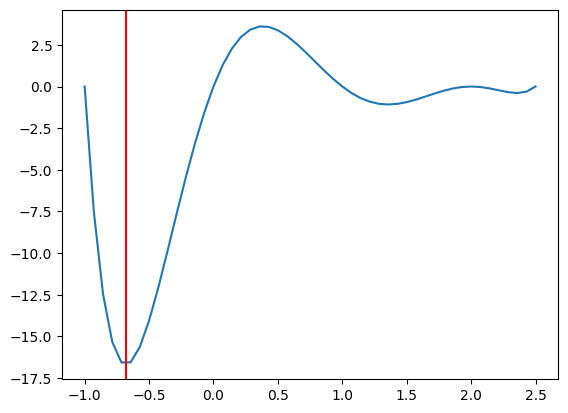

In [7]:
# Define the objective function
def sextic(x):
    return 2*x[0]**6 - 13*x[0]**5 + 26*x[0]**4 - 7*x[0]**3 - 28*x[0]**2 + 20*x[0]

# Define other algorithm parameters
bounds = np.array([[-1, 2.5]])
temp_range = [10, None]
step_size = 0.1
termination = {'max_step': 10000}

# Plot function
x = np.linspace(-1, 2.5, 50)
y = []
for element in x:
    y.append(sextic([element]))
plt.plot(x, y)
plt.axvline(x = -0.68, color = 'r', label = 'axvline - full height')

Final x value after 10000 iterations [-0.71390689]
Function value after 10000 iterations: -16.572551202458456


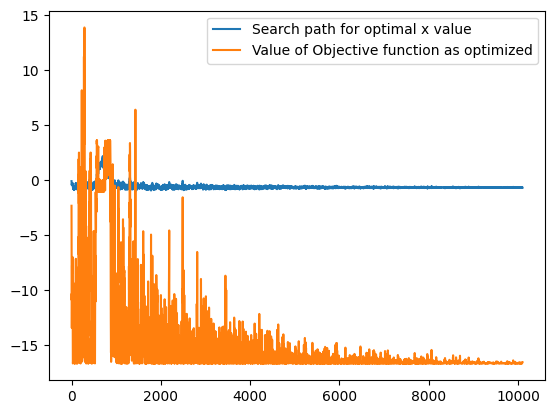

In [8]:
# Instantiate the Simulated Annealing class
anneal_sextic = SimulatedAnnealing(sextic, bounds, temp_range, step_size, termination)
# Run the simulated annealing algorithm
sextic_path, T_path = anneal_sextic.SimulatedAnneal()

print('Final x value after 10000 iterations', sextic_path[-1])
print('Function value after 10000 iterations:', sextic(sextic_path[-1]))

plt.plot(np.linspace(0, len(sextic_path), len(sextic_path)), sextic_path, label = 'Search path for optimal x value')
outputs = []
for element in sextic_path:
    outputs.append(sextic([element]))
plt.plot(np.linspace(0, len(sextic_path), len(sextic_path)), outputs, label = 'Value of Objective function as optimized')
plt.legend()

Now we will apply the model to the far more complicated 'Eggholder function', a test function for single-objective optimization.

In [22]:
# Define the objective function
def eggholder(x):
    return -(x[1]+47)*math.sin(math.sqrt(abs((x[0]/2)+(x[1]+47)))) - x[0]*math.sin(math.sqrt(abs(x[0] - (x[1]+47))))

# Define other algorithm parameters
bounds = np.array([[-512, 512], [-512, 512]])
temp_range = [1000, None] # Due to the many more local minima in this function we start from a higher initial temperature.
step_size = 0.1
termination = {'max_step': 10000000}

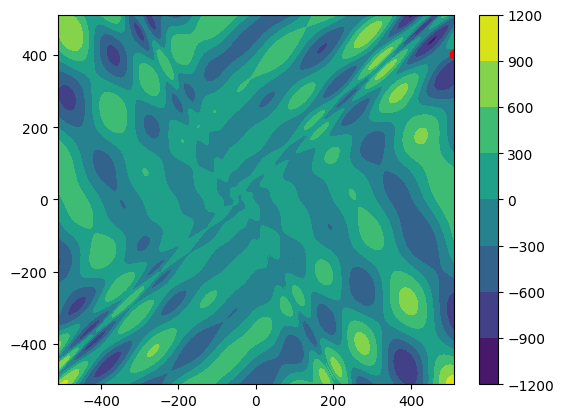

In [15]:
# Plot function
x = np.linspace(-512, 512, 1000)
y = np.linspace(-512, 512, 1000)
X, Y = np.meshgrid(x, y)
z = np.zeros((len(x), len(y)))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        xy = [x[i], y[j]]
        z[i,j] = eggholder(xy)

plt.contourf(x, y, z)
plt.colorbar()
plt.scatter(x = 512, y =  404.3723723723724, color = 'r', marker='o')

In this function, the global optima ($z = -959.6407$) lies at the point $x = 512$, $y = 404.2319$, indicated approximately by the red dot on the contour plot.

Final x and y values after 1,000,000 iterations: x= -204.64353235609252  and y= 52.84824998529478
Function value after 1,000,000 iterations: -301.5092083626296


/Users/laraherriott/Documents/Oxford/sci_computing/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/laraherriott/Documents/Oxford/sci_computing/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


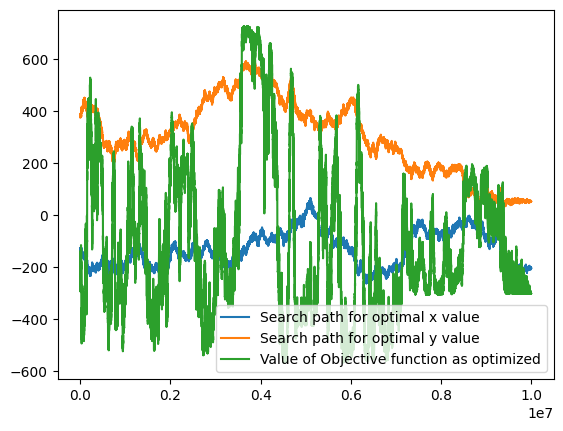

In [23]:
# Instantiate the Simulated Annealing class
# Due to the many global minima, we will also use a slower temperature decrease function.
anneal_eggholder = SimulatedAnnealing(eggholder, bounds, temp_range, step_size, termination, [Methods.LinearDecrease, Methods.GaussianStep, Methods.MetropolisAcceptance])
# Run the simulated annealing algorithm
eggholder_path, T_path = anneal_eggholder.SimulatedAnneal()

x_vals = []
y_vals = []
for i in range(0, len(eggholder_path)):
    x_vals.append(eggholder_path[i][0])
    y_vals.append(eggholder_path[i][1])

print('Final x and y values after 1,000,000 iterations: x=', eggholder_path[-1][0], ' and y=', eggholder_path[-1][1])
print('Function value after 1,000,000 iterations:', eggholder(eggholder_path[-1]))

plt.plot(np.linspace(0, len(eggholder_path), len(eggholder_path)), x_vals, label = 'Search path for optimal x value')
plt.plot(np.linspace(0, len(eggholder_path), len(eggholder_path)), y_vals, label = 'Search path for optimal y value')
outputs = []
for element in eggholder_path:
    outputs.append(eggholder(element))
plt.plot(np.linspace(0, len(eggholder_path), len(eggholder_path)), outputs, label = 'Value of Objective function as optimized')
plt.legend()

Though the combination of parameters used here (i.e. high initial temperature and slow cooling) seems to prevent the optimization algorithm becoming trapped in a local minima, even after 10,000,000 iterations this was not a sufficient set-up for the algorithm to land in the global optimum. This is likely because this particular landscape has a very large number of minima with similar depths. In addition, this speaks to a more general problem of the simulated annealing algorithm, in that there are many tuneable features, including the cooling schedule, which will impact the ability of the algorithm to efficiently find the global optimum for a given problem. There is no one-size-fits all approach for the methods and parameters which should be used.